In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.corpus import wordnet
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities, asyn_fluidc

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [18]:
open('sochiAD.csv')
#open('sochiBL.csv')
#open('sochiEX.csv')

<_io.TextIOWrapper name='sochiAD.csv' mode='r' encoding='cp1252'>

In [19]:
import codecs
with codecs.open("sochiAD.csv", "r",encoding='utf-8', errors='ignore') as file_data:
     sochiAD_raw = pd.read_csv(file_data)

In [20]:
#import codecs
#with codecs.open("sochiBL.csv", "r",encoding='utf-8', errors='ignore') as file_data:
     #sochiBL_raw = pd.read_csv(file_data)

In [21]:
#import codecs
#with codecs.open("sochiEX.csv", "r",encoding='utf-8', errors='ignore') as file_data:
     #sochiEX_raw = pd.read_csv(file_data)

In [22]:
sochiAD_raw.tail()
#sochiBL_raw.tail()
#sochiEX_raw.tail()

,source,target,weight
112133,TRUE,gold,1.0
112134,TRUE,hockey,1.0
112135,TRUE,GoCanadaGo,1.0
112136,TRUE,TeamCanada,1.0
112137,TRUE,WeAreWinter,1.0


In [23]:
sochiAD_raw['source'] = sochiAD_raw.source.astype(str)
sochiAD_raw['target'] = sochiAD_raw.target.astype(str)
#sochiBL_raw['source'] = sochiBL_raw.source.astype(str)
#sochiBL_raw['target'] = sochiBL_raw.target.astype(str)
#sochiEX_raw['source'] = sochiEX_raw.source.astype(str)
#sochiEX_raw['target'] = sochiEX_raw.target.astype(str)

In [24]:
sochiAD_raw['source'] = sochiAD_raw['source'].apply(lambda x:x.lower())
sochiAD_raw['target'] = sochiAD_raw['target'].apply(lambda x:x.lower())

In [25]:
#sochiBL_raw['source'] = sochiBL_raw['source'].apply(lambda x:x.lower())
#sochiBL_raw['target'] = sochiBL_raw['target'].apply(lambda x:x.lower())

In [26]:
#sochiEX_raw['source'] = sochiEX_raw['source'].apply(lambda x:x.lower())
#sochiEX_raw['target'] = sochiEX_raw['target'].apply(lambda x:x.lower())

In [27]:
sochiAD_raw.tail()

,source,target,weight
112133,true,gold,1.0
112134,true,hockey,1.0
112135,true,gocanadago,1.0
112136,true,teamcanada,1.0
112137,true,wearewinter,1.0


In [28]:
sochiAD_raw.dropna()

#df_sochi_bl.dropna()
#df_sochi_ex.dropna()

,source,target,weight
0,14-feb,un,1.0
1,14-feb,usa,1.0
2,14-feb,uk,1.0
3,14-feb,gcc,1.0
4,14-feb,humanrights,2.0
...,...,...,...
112133,true,gold,1.0
112134,true,hockey,1.0
112135,true,gocanadago,1.0
112136,true,teamcanada,1.0


In [29]:
sochiAD_raw.shape
sochi_ad_sample = sochiAD_raw.sample(n=15000)

In [30]:
for index, row in sochi_ad_sample.iterrows():
    if not wordnet.synsets(row['source']):
        sochi_ad_sample.drop(index,inplace=True)
    elif not wordnet.synsets(row['target']):
        sochi_ad_sample.drop(index,inplace=True)

In [31]:
G_s_ad = nx.from_pandas_edgelist(sochi_ad_sample,'source','target','weight')

In [32]:
c = list(greedy_modularity_communities(G_s_ad))

In [34]:
c

[frozenset({'u',
            'bong',
            'bike',
            'snow',
            'taxi',
            'embarrassed',
            'coffee',
            'don',
            'adoption',
            'landscape',
            'allah',
            'hokey',
            'athens',
            'kharkiv',
            'german',
            'night',
            'expert',
            'pussy',
            'peace',
            'kuwait',
            'tits',
            'volunteers',
            'jump',
            'honesty',
            'butters',
            'rio',
            'headline',
            'alternative',
            'presleys',
            'beat',
            'finance',
            'i',
            'over',
            'sprinting',
            'cias',
            'senior',
            'money',
            'dream',
            'eve',
            'nsa',
            'federation',
            'glory',
            'hdl',
            'team',
            'staring',
            'happy',
       

In [40]:
nx.write_gexf(G_s_ad, "test.gexf")

In [64]:
print(nx.info(G_s_ad))

Name: 
Type: Graph
Number of nodes: 1818
Number of edges: 2894
Average degree:   3.1837


In [38]:
degree_sequence = sorted(G_s_ad.degree(), key=lambda x: x[1], reverse=True)
degree_sequence

[('olympics', 153),
 ('usa', 148),
 ('canada', 130),
 ('hockey', 91),
 ('russia', 88),
 ('olympic', 70),
 ('gold', 57),
 ('finland', 52),
 ('live', 48),
 ('bronze', 44),
 ('love', 42),
 ('news', 36),
 ('sweden', 33),
 ('in', 30),
 ('winter', 29),
 ('snowboard', 28),
 ('us', 28),
 ('can', 26),
 ('sport', 24),
 ('uk', 23),
 ('games', 23),
 ('snow', 21),
 ('slalom', 21),
 ('hot', 20),
 ('mexico', 19),
 ('curling', 19),
 ('norway', 19),
 ('ski', 19),
 ('women', 19),
 ('putin', 19),
 ('beautiful', 18),
 ('sun', 18),
 ('medal', 18),
 ('vancouver', 18),
 ('suomi', 17),
 ('canadian', 17),
 ('breaking', 17),
 ('germany', 17),
 ('clothes', 17),
 ('france', 16),
 ('travel', 16),
 ('london', 16),
 ('win', 15),
 ('ice', 15),
 ('music', 15),
 ('men', 15),
 ('silver', 15),
 ('beach', 15),
 ('sports', 15),
 ('cute', 15),
 ('track', 14),
 ('like', 14),
 ('venezuela', 14),
 ('great', 14),
 ('ukraine', 14),
 ('art', 13),
 ('spain', 13),
 ('after', 13),
 ('toronto', 13),
 ('striking', 13),
 ('kiev', 13),


In [42]:
density = nx.density(G_s_ad)
print("Network density:", density)

Network density: 0.0017521840241261331


In [43]:
print(nx.is_connected(G_s_ad))

False


In [47]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_s_ad)
largest_component = max(components, key=len)
#largest_component

In [48]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
subgraph = G_s_ad.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 12


In [49]:
degree_dict = dict(G_s_ad.degree(G_s_ad.nodes()))
nx.set_node_attributes(G_s_ad, degree_dict, 'degree')

In [50]:
print(G_s_ad.nodes['olympics'])

{'degree': 153}


In [52]:
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [53]:
print("Top 100 nodes by degree:")
for d in sorted_degree[:100]:
    print(d)

Top 100 nodes by degree:
('olympics', 153)
('usa', 148)
('canada', 130)
('hockey', 91)
('russia', 88)
('olympic', 70)
('gold', 57)
('finland', 52)
('live', 48)
('bronze', 44)
('love', 42)
('news', 36)
('sweden', 33)
('in', 30)
('winter', 29)
('snowboard', 28)
('us', 28)
('can', 26)
('sport', 24)
('uk', 23)
('games', 23)
('snow', 21)
('slalom', 21)
('hot', 20)
('mexico', 19)
('curling', 19)
('norway', 19)
('ski', 19)
('women', 19)
('putin', 19)
('beautiful', 18)
('sun', 18)
('medal', 18)
('vancouver', 18)
('suomi', 17)
('canadian', 17)
('breaking', 17)
('germany', 17)
('clothes', 17)
('france', 16)
('travel', 16)
('london', 16)
('win', 15)
('ice', 15)
('music', 15)
('men', 15)
('silver', 15)
('beach', 15)
('sports', 15)
('cute', 15)
('track', 14)
('like', 14)
('venezuela', 14)
('great', 14)
('ukraine', 14)
('art', 13)
('spain', 13)
('after', 13)
('toronto', 13)
('striking', 13)
('kiev', 13)
('tribute', 13)
('fun', 13)
('go', 12)
('team', 12)
('life', 12)
('figure', 12)
('ontario', 12)
(

In [54]:
betweenness_dict = nx.betweenness_centrality(G_s_ad) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G_s_ad) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G_s_ad, betweenness_dict, 'betweenness')
nx.set_node_attributes(G_s_ad, eigenvector_dict, 'eigenvector')

In [55]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('usa', 0.1609440458338738)
('canada', 0.14714971839921848)
('olympics', 0.1452841043917296)
('hockey', 0.09213429896709115)
('russia', 0.08181395035615176)
('olympic', 0.07491688800491157)
('gold', 0.04669004461315845)
('live', 0.0423656017959774)
('bronze', 0.040898469280716235)
('finland', 0.037597935572360755)
('love', 0.0354207875342905)
('sweden', 0.029925752059246406)
('in', 0.024083585678767908)
('news', 0.02327841095113488)
('us', 0.0184028668009955)
('hot', 0.017893192714270534)
('winter', 0.01685746771294524)
('can', 0.01653073932833202)
('snowboard', 0.01614349124542581)
('beach', 0.01609879966127481)


In [56]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: usa | Betweenness Centrality: 0.1609440458338738 | Degree: 148
Name: canada | Betweenness Centrality: 0.14714971839921848 | Degree: 130
Name: olympics | Betweenness Centrality: 0.1452841043917296 | Degree: 153
Name: hockey | Betweenness Centrality: 0.09213429896709115 | Degree: 91
Name: russia | Betweenness Centrality: 0.08181395035615176 | Degree: 88
Name: olympic | Betweenness Centrality: 0.07491688800491157 | Degree: 70
Name: gold | Betweenness Centrality: 0.04669004461315845 | Degree: 57
Name: live | Betweenness Centrality: 0.0423656017959774 | Degree: 48
Name: bronze | Betweenness Centrality: 0.040898469280716235 | Degree: 44
Name: finland | Betweenness Centrality: 0.037597935572360755 | Degree: 52
Name: love | Betweenness Centrality: 0.0354207875342905 | Degree: 42
Name: sweden | Betweenness Centrality: 0.029925752059246406 | Degree: 33
Name: in | Betweenness Centrality: 0.024083585678767908 | Degree: 30
Name: news | Betweenness Centrality: 0.02327841095113488 | Degree: 36


In [57]:
communities = community.greedy_modularity_communities(G_s_ad)

In [58]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G_s_ad, modularity_dict, 'modularity')

In [59]:
# First get a list of just the nodes in that class
class0 = [n for n in G_s_ad.nodes() if G_s_ad.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G_s_ad.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: usa | Eigenvector Centrality: 0.3577638694422397
Name: olympics | Eigenvector Centrality: 0.3232225153013964
Name: canada | Eigenvector Centrality: 0.30007641322242345
Name: russia | Eigenvector Centrality: 0.23532149543259295
Name: olympic | Eigenvector Centrality: 0.16063784109511534


In [60]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['u', 'bong', 'bike', 'snow', 'taxi', 'embarrassed', 'coffee', 'don', 'adoption', 'landscape', 'allah', 'hokey', 'athens', 'kharkiv', 'german', 'night', 'expert', 'pussy', 'peace', 'kuwait', 'tits', 'volunteers', 'jump', 'honesty', 'butters', 'rio', 'headline', 'alternative', 'presleys', 'beat', 'finance', 'i', 'over', 'sprinting', 'cias', 'senior', 'money', 'dream', 'eve', 'nsa', 'federation', 'glory', 'hdl', 'team', 'staring', 'happy', 'are', 'fact', 'endurance', 'indie', 'drew', 'cuba', 'traditional', 'uruguay', 'siberian', 'manchester', 'surprise', 'software', '70s', 'wet', 'honors', 'semis', 'next', 'lebanon', 'audio', 'beach', 'friendly', 'moose', 'rating', 'crimea', 'gold', 'ex', 'softball', 'comments', 'hackney', 'media', 'loves', 'india', 'sushi', 'medals', 'korea', 'contest', 'captures', 'held', 'glasses', 'awesome', 'vote', 'wins', 'pennsylvania', 'displacement', 'latvia', 'subversion', 'disco', 'disease', 'necklace', 'r', 'gaga', 'follower', 'white', 'title', 'past

In [67]:
nx.write_gexf(G_s_ad, 'quaker_network.gexf')

In [83]:
I= nx.erdos_renyi_graph(15000,0.2) 
#nx.draw(I, with_labels=True) 
#plt.show()

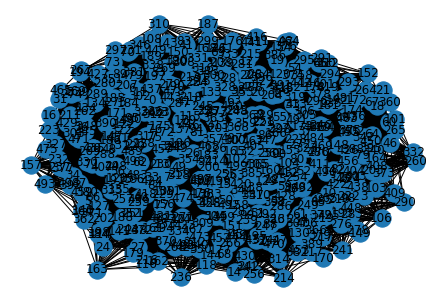

In [72]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
#nx.draw(I, with_labels=True) 
#plt.show()


In [ ]:
ba = nx.barabasi_albert_graph(100, 5)
#nx.draw(I, with_labels=True) 
#plt.show()

In [74]:
# Clustering coefficient of all nodes (in a dictionary) 
clust_coefficients = nx.clustering(G_s_ad)

In [79]:
# Or use directly the built-in method
print (nx.average_clustering(G_s_ad))


0.04932021874005327


In [ ]:
print (nx.average_clustering(I))